In [2]:
import pandas as pd

In [16]:

df = pd.read_csv("Pizza_Sale - pizza_sales.csv")

def date_taime(text):
    try:
        return pd.to_datetime(text, format="%d-%m-%Y")
    except ValueError:
        try:
            return pd.to_datetime(text, format="%d/%m/%Y")
        except ValueError:
            return pd.NaT
df['order_date'] = df['order_date'].apply(date_taime)

df.dropna(inplace= True)

In [17]:
df.to_csv("pizza_sales.csv",index=False)

In [7]:
df = pd.read_csv("pizza_sales.csv", parse_dates=['order_date'],index_col='order_date')


In [8]:
type(df['order_date'][0])

KeyError: 'order_date'

In [9]:
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
order_date,,,,,,,,,,,
2015-01-01,1,1,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2015-01-01,2,2,classic_dlx_m,1,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [10]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48554.000000,48554.000000,48554.000000,48554.000000,48554.000000
mean,24342.866458,10715.733081,1.019648,16.493957,16.821744
std,14017.563232,6172.205962,0.143172,3.621876,4.438471
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12205.250000,5360.250000,1.000000,12.750000,12.750000
50%,24343.500000,10702.000000,1.000000,16.500000,16.500000
75%,36481.750000,16107.750000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [11]:
df.loc['2015-01'].total_price.mean()

np.float64(16.796136919315398)

### particular date sales

In [12]:
df.loc['2015-01-01']

,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
order_date,,,,,,,,,,,
2015-01-01,1,1,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2015-01-01,2,2,classic_dlx_m,1,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2015-01-01,3,2,five_cheese_l,1,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
2015-01-01,4,2,ital_supr_l,1,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
2015-01-01,5,2,mexicana_m,1,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,157,67,southw_ckn_l,1,22:03:40,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
2015-01-01,158,68,classic_dlx_m,1,22:07:32,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2015-01-01,159,68,ital_supr_l,1,22:07:32,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [13]:
df['total_price'].resample('M').sum()

C:\Users\New\AppData\Local\Temp\ipykernel_23636\1318165623.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['total_price'].resample('M').sum()


order_date
2015-01-31    68696.20
2015-02-28    65159.60
2015-03-31    70397.10
2015-04-30    68736.80
2015-05-31    71402.75
2015-06-30    68230.20
2015-07-31    72557.90
2015-08-31    68278.25
2015-09-30    64180.05
2015-10-31    64027.60
2015-11-30    70395.35
2015-12-31    64701.15
Freq: ME, Name: total_price, dtype: float64

<Axes: xlabel='order_date'>

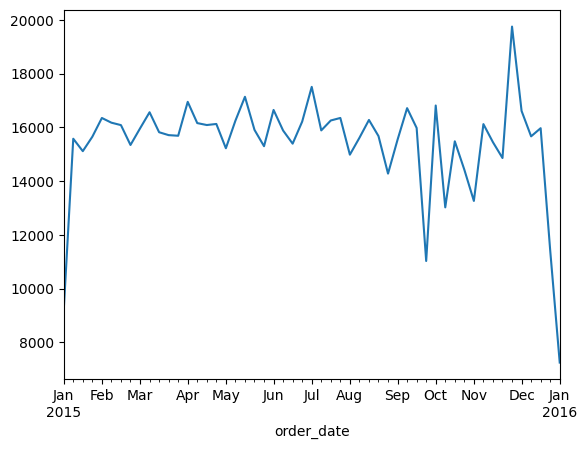

In [14]:
%matplotlib inline
df['total_price'].resample('W').sum().plot()

<Axes: xlabel='order_date'>

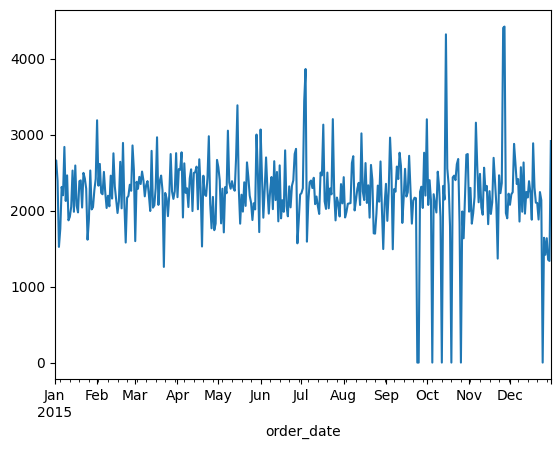

In [16]:
df['total_price'].resample('D').sum().plot()

### check stationary

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The serious is stationary")
    else:
        print("the series is not stationary")

adf_test(df['quantity'])

ADF Statistic: -54.185054902168716
p-value: 0.0
The serious is stationary
